# Logistic Regression for binary classification in keras - Example-2

### Experiment - normalizing of input data and changing the optimizer, reducing the batch size

## import the required libraries

In [1]:
import os  

import numpy as np  
import pandas as pd 
 
import matplotlib.pyplot as plt  
%matplotlib inline

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import keras
print (keras.__version__)


Using TensorFlow backend.


2.2.2


## Load the data

In [2]:
path = os.getcwd() + '\ex2data1.txt'  
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Admitted'])  
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Plot the dataset

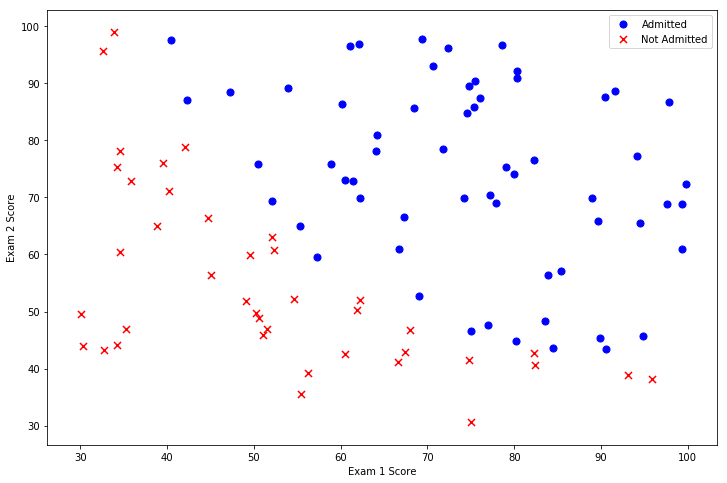

In [3]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

In [4]:
print (data.shape)

(100, 3)


In [5]:
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

In [6]:

X = np.array(X.values)
y = np.array(y.values)
print ('data_shape: ',X.shape)
print ('label_shape:',y.shape)

data_shape:  (100, 2)
label_shape: (100, 1)


In [7]:
max_x1 = np.max(X[0])
max_x2 = np.max(X[1])
print (max_x1,max_x2)

78.0246928154 43.894997524


In [8]:
X[0:10]

array([[ 34.62365962,  78.02469282],
       [ 30.28671077,  43.89499752],
       [ 35.84740877,  72.90219803],
       [ 60.18259939,  86.3085521 ],
       [ 79.03273605,  75.34437644],
       [ 45.08327748,  56.31637178],
       [ 61.10666454,  96.51142588],
       [ 75.02474557,  46.55401354],
       [ 76.0987867 ,  87.42056972],
       [ 84.43281996,  43.53339331]])

In [9]:
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [10]:
num_epoch = 100
batch_size = 32

In [13]:
model = Sequential()
#model.add(Dense(1, input_dim=2, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.fit(X, y, nb_epoch=10, validation_data=(x_val, y_val))
hist = model.fit(X, y, epochs=num_epoch,batch_size=batch_size)

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 8.8109 - acc: 0.3600
Epoch 2/100
100/100 [==============================] - 0s 156us/step - loss: 7.7979 - acc: 0.3300
Epoch 3/100
100/100 [==============================] - 0s 312us/step - loss: 6.1704 - acc: 0.4000
Epoch 4/100
100/100 [==============================] - 0s 156us/step - loss: 5.3624 - acc: 0.5100
Epoch 5/100
100/100 [==============================] - 0s 312us/step - loss: 4.7675 - acc: 0.5500
Epoch 6/100
100/100 [==============================] - 0s 156us/step - loss: 4.7303 - acc: 0.5500
Epoch 7/100
100/100 [==============================] - 0s 156us/step - loss: 4.3971 - acc: 0.5600
Epoch 8/100
100/100 [==============================] - 0s 312us/step - loss: 4.3413 - acc: 0.5800
Epoch 9/100
100/100 [==============================] - 0s 156us/step - loss: 4.3119 - acc: 0.5600
Epoch 10/100
100/100 [==============================] - 0s 156us/step - loss: 4.2559 - acc: 0.5600
Epoch 11/100
100/100 

100/100 [==============================] - 0s 156us/step - loss: 0.7554 - acc: 0.5400
Epoch 84/100
100/100 [==============================] - 0s 156us/step - loss: 0.7878 - acc: 0.5000
Epoch 85/100
100/100 [==============================] - 0s 156us/step - loss: 0.6383 - acc: 0.5900
Epoch 86/100
100/100 [==============================] - 0s 156us/step - loss: 0.8032 - acc: 0.5400
Epoch 87/100
100/100 [==============================] - 0s 312us/step - loss: 0.7612 - acc: 0.6200
Epoch 88/100
100/100 [==============================] - 0s 312us/step - loss: 0.6694 - acc: 0.5800
Epoch 89/100
100/100 [==============================] - 0s 156us/step - loss: 0.7875 - acc: 0.6000
Epoch 90/100
100/100 [==============================] - 0s 156us/step - loss: 0.6610 - acc: 0.5300
Epoch 91/100
100/100 [==============================] - 0s 156us/step - loss: 0.9353 - acc: 0.4200
Epoch 92/100
100/100 [==============================] - 0s 156us/step - loss: 0.6822 - acc: 0.5600
Epoch 93/100
100/100 [=

## Plotting the loss and accuracy curve

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

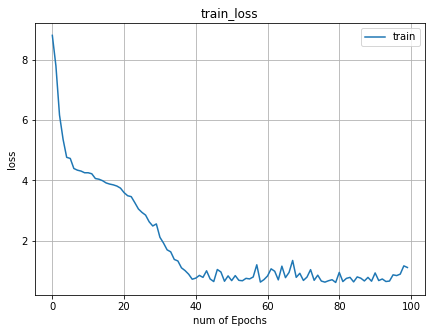

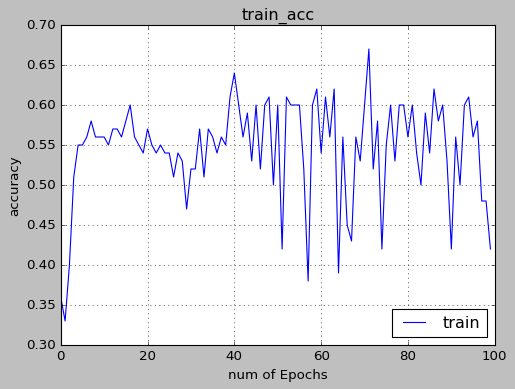

In [15]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# To save the figure
plt.savefig('loss_ex-2.png')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# To save the figure
plt.savefig('acc_ex-2.png')

## Normalizing the data and changing optimizer

In [16]:
# normalize data
X_norm = X/60

In [17]:
model = Sequential()
#model.add(Dense(1, input_dim=2, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.fit(X, y, nb_epoch=10, validation_data=(x_val, y_val))
hist = model.fit(X_norm, y, epochs=num_epoch,batch_size=batch_size)

Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 0.7220 - acc: 0.4700
Epoch 2/100
100/100 [==============================] - 0s 156us/step - loss: 0.7063 - acc: 0.5000
Epoch 3/100
100/100 [==============================] - 0s 156us/step - loss: 0.6865 - acc: 0.5600
Epoch 4/100
100/100 [==============================] - 0s 156us/step - loss: 0.6718 - acc: 0.5800
Epoch 5/100
100/100 [==============================] - 0s 156us/step - loss: 0.6598 - acc: 0.6300
Epoch 6/100
100/100 [==============================] - 0s 312us/step - loss: 0.6549 - acc: 0.6600
Epoch 7/100
100/100 [==============================] - 0s 156us/step - loss: 0.6487 - acc: 0.6400
Epoch 8/100
100/100 [==============================] - 0s 156us/step - loss: 0.6468 - acc: 0.6300
Epoch 9/100
100/100 [==============================] - 0s 156us/step - loss: 0.6468 - acc: 0.6200
Epoch 10/100
100/100 [==============================] - 0s 312us/step - loss: 0.6463 - acc: 0.6100
Epoch 11/100
100/100 

100/100 [==============================] - 0s 156us/step - loss: 0.5536 - acc: 0.7200
Epoch 84/100
100/100 [==============================] - 0s 176us/step - loss: 0.5525 - acc: 0.7200
Epoch 85/100
100/100 [==============================] - 0s 156us/step - loss: 0.5518 - acc: 0.7200
Epoch 86/100
100/100 [==============================] - 0s 156us/step - loss: 0.5512 - acc: 0.7200
Epoch 87/100
100/100 [==============================] - 0s 156us/step - loss: 0.5500 - acc: 0.7200
Epoch 88/100
100/100 [==============================] - 0s 156us/step - loss: 0.5492 - acc: 0.7200
Epoch 89/100
100/100 [==============================] - 0s 156us/step - loss: 0.5480 - acc: 0.7200
Epoch 90/100
100/100 [==============================] - 0s 156us/step - loss: 0.5467 - acc: 0.7200
Epoch 91/100
100/100 [==============================] - 0s 156us/step - loss: 0.5453 - acc: 0.7400
Epoch 92/100
100/100 [==============================] - 0s 156us/step - loss: 0.5445 - acc: 0.7400
Epoch 93/100
100/100 [=

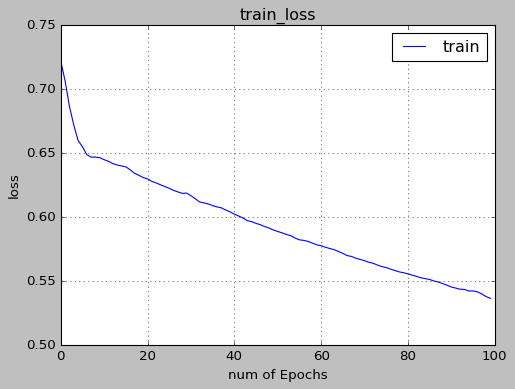

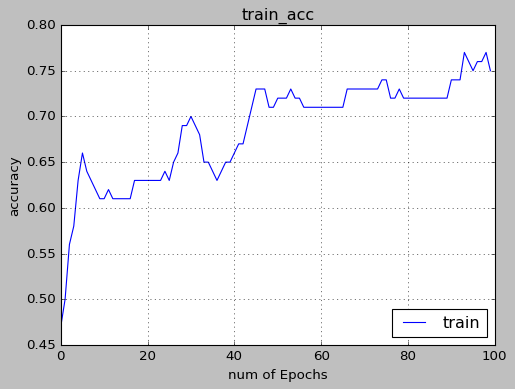

In [18]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# To save the figure
plt.savefig('loss_ex-2_norm.png')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# To save the figure
plt.savefig('acc_ex-2_norm.png')

## Evaluating the trained model

In [20]:
score = model.evaluate(X_norm,y)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')


100/100 [==============================] - 0s 468us/step
loss: 0.535867931843
acc:  74.0%


## Computing the prediction on new data

In [21]:
model.predict(X_norm[90:100])

array([[ 0.81268197],
       [ 0.80637127],
       [ 0.54356962],
       [ 0.72609556],
       [ 0.76324546],
       [ 0.73376495],
       [ 0.52644581],
       [ 0.82674402],
       [ 0.58363217],
       [ 0.73287839]], dtype=float32)

In [22]:
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [23]:
model.predict_classes(X_norm[90:100])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

## Saving the model and weights

In [24]:
# serialize model to JSON
model_json = model.to_json()
with open("logistic_reg_model_ex_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("logistic_reg_model_weights_ex_2.h5")
print("Saved model to disk")

Saved model to disk


## Loading the model and weights

In [25]:
from keras.models import model_from_json
from keras.models import load_model

In [26]:
model_name = "logistic_reg_model_ex_2.json"
weight_name = "logistic_reg_model_weights_ex_2.h5"

json_file = open(model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weight_name)
print("Loaded model from disk")

Loaded model from disk


In [27]:
loaded_model.predict(X_norm[90:100])

array([[ 0.81268197],
       [ 0.80637127],
       [ 0.54356962],
       [ 0.72609556],
       [ 0.76324546],
       [ 0.73376495],
       [ 0.52644581],
       [ 0.82674402],
       [ 0.58363217],
       [ 0.73287839]], dtype=float32)

In [28]:
#model.save('model.5')
#loaded_model=load_model('model.h5')